<a href="https://colab.research.google.com/github/Liza-Kadetova/HseCL_kadetova/blob/master/hw2_ML_Liza_K.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Большая домашка 1: классификация отзывов

## Данные и задача

Скачиваются по [ссылке](https://drive.google.com/open?id=1gJEpwM3zdV5xe9nRU0VwQmGTiOTQdp10). Это отзывы пользователей на фильмы с КиноПоиска.

In [0]:
import pandas as pd
from matplotlib import pyplot as plt

In [0]:
df = pd.read_csv('reviews.csv')

In [3]:
df.head()

,label,text
0,1,Эпиграф Добро которое ты делаешь от сердца ты ...
1,1,Теперь это один из моих любимых фильмов в жанр...
2,1,Что скрыто в фильме Лучше не бывает Одна шикар...
3,1,Перед нами очень милое и доброе кино которое л...
4,1,Завязка Мелвин Удал популярный писатель Нет не...


In [4]:
set(df.label)

{-1, 0, 1}

In [5]:
len(df.text)

46501

В колонке `label` три класса: положительный (1), нейтральный (0) и отрицательный (-1).

## Baseline

In [0]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import classification_report
import numpy as np

In [0]:
vec = CountVectorizer()
bag_of_words = vec.fit_transform(df.text)
X_train, X_test, y_train, y_test = train_test_split(bag_of_words, df.label)

In [0]:
nb = MultinomialNB()
clf = nb.fit(X_train, y_train)

In [43]:
print(classification_report(y_test, clf.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.70      0.20      0.31      1109
           0       0.28      0.06      0.09      1425
           1       0.81      0.98      0.89      9092

    accuracy                           0.79     11626
   macro avg       0.60      0.41      0.43     11626
weighted avg       0.74      0.79      0.74     11626



## Задание

Побейте baseline выше как минимум тремя способами.


**Обязательно**:
* попробовать разный препроцессинг (2 балла)
* попробовать разные классификаторы (2 балла)
* поподбирать гиперпараметры классификаторов, можно с использованием GridSearch (2 балла)
* попробуйте объяснить полученные результаты (2 балла)
* визуализируйте веса признаков для лучшей модели (если лучшая модель не выдаёт коэффициенты признаков, возьмите логистическую регрессию); какие признаки оказались самыми значимыми? (2 балла)

Если вы перебрали уже много разных способов и выполнили все обязательные критерии, но побить baseline тремя способами так и не получилось, не беспокойтесь. Главное -- полнота попыток :)

Good luck and have fun! ;)

### Бонус
(+2 балла к основному заданию; оценка за всё задание может быть выше 10)

Придумайте ещё 2-3 осмысленных споцоба визуализации данных или результатов. Добавьте их ниже или в текст основного задания. и сошлитесь на них здесь.

# Результаты

**Общий итог и выводы.**

Побить baseline удалось несколькими авнении способами, причем все они дали почти один и тот же результат. 

**Самой успешной по результату и скороcти оказалась простая LogisticRegression в сочетании с CountVectorizer.** Возможно, ее выдачу можно было бы еще улучшить с помощью гиперапаметров, но удалось попробовать не все: они сильно удлиняют обучение или обрушивают память. Подбор вручную занимает много времени, а Grid уходит в вечность.

---

Можно предположить, что результаты такие низкие независимо от настроект, т.к.:
- в отзывах много отсылок к фильму, о котором отзыв, лексика смешивается: хороший отзыв о драме\катастрофе\ужастике выглядит как плохой
- может быть много неграмотных написаний, например, раздельное написание "не" со словами, что при учете униграмм или выбросе стоп-слов меняет их смысл на противоположный

---

Ниже представлены 3 попытки (в соответствии с заданием), которые побили baseline. В "подвале" ноутбука - все остальные.

**Резюме по попыткам**

Векторизация по (словесным) биграммам и триграммам (вместо униграмм то есть отдельных слов) не дало улучшений ни с одной моделью незвисимо от предобработки текста.

Предобработка текста (лемматизация pymorpthy2, понижение регистра, выброс стоп слов, цифр и т.д.) не дало улучшений в LR, но существенно улучилось результаты MulitiNB, сделав их почти такими же, как в LR (без предобработки). При этом,хотя NB работает ощутимо быстрее, чем LR, вместе с предобработкой (лемматизацией) он занимает больше времени, чем LR сама по себе. 

Изменение гиреперпараметров моделей не дало результата, за исключением случаев, когда оно было вынужденным: увеличить max_iter в LR и SVC требовали сами модели.

TfidfVectorizer удалось попробовать с LR - улучшений не было. MultiNB не захотел с ним работать (как я понимаю, потому что получается веткор не дискретных значений), а GaussianNB отказался брать sparse матрицу, а при попытке переделать ее в dense все падало и приходилось перезапускать весь ноутбук.
max_df = 0.80 в CountVectorizer тоже не улучшил результат. 


# Препроцессинг

Добавляется отдельная колонка в датафрейм, чтобы на нее и на оригинальные тексты можно было ссылать дальше независимо. 

In [86]:
!pip install pymorphy2[fast]
import pymorphy2
from pymorphy2 import MorphAnalyzer
morph_analyzer = pymorphy2.MorphAnalyzer()
from string import digits
import re

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('russian')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
def text_prep(text):
    clean_text = text.translate(str.maketrans('', '', '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~«»№!—'))
    clean_text = clean_text.translate(str.maketrans('', '', digits))
    clean_text = re.sub("-", " ", clean_text)
    clean_text = clean_text.lower()
    clean_text = clean_text.split()
    clean_words = [word for word in clean_text if word not in stop_words]
    lemmas = [morph_analyzer.parse(word)[0].normal_form for word in clean_text]
    return lemmas


In [0]:
new_text = []
for item in df["text"]:
  item = text_prep(item)
  new_text.append(" ".join([l for l in item]))

In [92]:
new_text[:2] #это список списков

['эпиграф добро который ты делать от сердце ты делать всегда себя литр наш толстой думать я не погрешить против истина если сказать что хороший в это фильм это собачка оскар она она прекрасный оригинальный и достигнуть такой вершина актёрский мастерство к который не смочь дотянуться даже джек николсон а джек как мы весь известно в план актёрский мастерство ещё тот красавчик и если вдруг вы на минутка прийти в голова что слишком быстро ворчливый писатель растаять сердце просто заглянуть в она бездонный глаз воистину собачка двигатель добрый дело прогресс и ментальный рост тут же не мочь удержаться от аллюзия на сияние не иначе джек торренс выжить вселиться в джек николсон чтобы наконец превратиться в мелвин адел топор вот только потерять то и прийтись учиться запирать дверь по пять раз чтобы защититься от назойливый сосед а ещё вот иногда думать тяжело житься человек иметь окр обсессивный компульсивный расстройство безлико назвать в фильм навязчивый состояние хорошо если у человек фикса

In [0]:
df = df.assign(bag = new_text)

In [95]:
df.tail()

,label,text,bag
46496,-1,Американцы по натуре же своей лентяи живущие в...,американец по натура же свой лентяй жить в пос...
46497,-1,И вновь Дэвид собрал свою любимую компашку акт...,и вновь дэвид собрать свой любимый компашка ак...
46498,-1,Это провал Именно с этих строк хотелось бы нач...,это провал именно с этот строка хотеться бы на...
46499,-1,Один из главных фильмов прошлого года Афера по...,один из главный фильм прошлое год афера по аме...
46500,-1,Впечатления в двух словах после просмотра редк...,впечатление в два слово после просмотр редкий ...


# Попытка 3: baseline побит! Best

Модель LogisticRegression, max_iter = 500

In [0]:
from sklearn.linear_model import LogisticRegression

In [0]:
vec3 = CountVectorizer()
bag_of_words3 = vec3.fit_transform(df.text)
x_train, x_test, y_train, y_test = train_test_split(bag_of_words3, df.label)

In [0]:
lr = LogisticRegression(max_iter = 500)
clf3 = lr.fit(x_train, y_train)

In [38]:
print(classification_report(y_test, clf3.predict(x_test)))

              precision    recall  f1-score   support

          -1       0.65      0.55      0.60      1092
           0       0.39      0.26      0.31      1422
           1       0.89      0.95      0.92      9112

    accuracy                           0.83     11626
   macro avg       0.64      0.59      0.61     11626
weighted avg       0.80      0.83      0.81     11626



In [39]:
clf3.coef_

array([[-0.00501075, -0.1146949 ,  0.03285642, ..., -0.00130629,
        -0.02427558, -0.00025641],
       [-0.03055178,  0.0618161 , -0.0466983 , ..., -0.00489744,
         0.06204343, -0.00017746],
       [ 0.03556253,  0.0528788 ,  0.01384188, ...,  0.00620374,
        -0.03776786,  0.00043387]])

In [40]:
clf3.coef_.shape 

(3, 369844)

In [0]:
clf3.coef_[0]

In [57]:
min(enumerate(clf3.coef_[0]), key=lambda pair: pair[1])

(251815, -0.5973101927223046)

In [43]:
max(enumerate(clf3.coef_[0]), key=lambda pair: pair[1])

(168411, 0.7698164439773223)

In [0]:
index_to_word = {
    ind: word
    for (word, ind)
    in vec3.vocabulary_.items()
    }

In [58]:
index_to_word[251815]

'приятно'

In [66]:
# первые 10 коэффициентов
top_features = sorted(enumerate(clf3.coef_[0]), key=lambda pair: pair[1], reverse=True)[:20]
for index, value in top_features:
  print(index_to_word[index], " - ", value)

нелепо  -  0.7698164439773223
скучно  -  0.667243809001053
скучный  -  0.6591466910666316
предсказуемо  -  0.6017624995530948
бред  -  0.5719307824093542
остальное  -  0.5361786926777384
видимо  -  0.5292608507760915
единственный  -  0.5163514427937459
разочарование  -  0.49979001454977207
якобы  -  0.48448474993961615
неинтересный  -  0.484187450753444
минуте  -  0.4804949521761421
рейтинг  -  0.4758215862057046
ужасна  -  0.47436536531624246
единственное  -  0.464106431483554
полное  -  0.4634033510387517
понимаю  -  0.44761286110526266
отрицательный  -  0.4452025550751607
досмотреть  -  0.439872636839679
высокие  -  0.4379501293910743


# Попытка 4: тоже побит!

Модель svc

Сырой текст

Результат - примерно как у ЛР

In [0]:
from sklearn.svm import LinearSVC

In [0]:
vec4 = CountVectorizer()
bag_of_words4 = vec4.fit_transform(df.text)
x_train, x_test, y_train, y_test = train_test_split(bag_of_words4, df.label)

In [22]:
type(bag_of_words4)

scipy.sparse.csr.csr_matrix

In [0]:
svc = LinearSVC(max_iter = 2500)
clf4 = svc.fit(x_train, y_train)

In [11]:
print(classification_report(y_test, clf4.predict(x_test)))

              precision    recall  f1-score   support

          -1       0.63      0.50      0.56      1141
           0       0.32      0.26      0.29      1385
           1       0.88      0.93      0.90      9100

    accuracy                           0.81     11626
   macro avg       0.61      0.56      0.58     11626
weighted avg       0.79      0.81      0.80     11626



# Попытка 6: тоже побит! 
Модель  NB

Текст предобработанный

Результат - примерно как у ЛР

In [0]:
vec6 = CountVectorizer()
bag_of_words6 = vec6.fit_transform(df.bag)
x_train, x_test, y_train, y_test = train_test_split(bag_of_words6, df.label)

In [0]:
nb6 = MultinomialNB
clf6 = nb6.fit(x_train, y_train)

In [121]:
print(classification_report(y_test, clf6.predict(x_test)))

              precision    recall  f1-score   support

          -1       0.55      0.63      0.58      1113
           0       0.32      0.34      0.33      1441
           1       0.91      0.88      0.89      9072

    accuracy                           0.79     11626
   macro avg       0.59      0.62      0.60     11626
weighted avg       0.80      0.79      0.79     11626



# Визуализация 

Простая, т.к. нас этому почти не учили (как работать с разными типами данных, как их подавать в график, чтобы он не ругался)

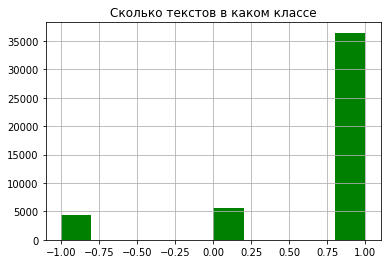

In [25]:
plt.hist(df.label, color = "g")
plt.title("Сколько текстов в каком классе")
plt.grid()

In [0]:
str = " ".join(i for i in df.bag)

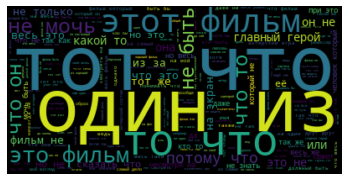

In [95]:
#Облако самых частотных слов в коллекции.
#Судя по результату, нужно расширить список стоп-слов (не успела)

from wordcloud import WordCloud
wordcloud = WordCloud()
wordcloud.generate(str)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
# Функция стащена из статьи: 
#https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d
#Должна визуализировать коэфф. признаков, но не получается :(


def plot_coefficients(classifier, feature_names, top_features=20):
 coef = classifier.coef_.ravel()
 top_positive_coefficients = np.argsort(coef)[-top_features:]
 top_negative_coefficients = np.argsort(coef)[:top_features]
 top_coefficients = np.hstack([top_negative_coefficients, top_positive_coefficients])
 # create plot
 plt.figure(figsize=(15, 5))
 colors = ['red' if c < 0 else 'blue' for c in coef[top_coefficients]]
 plt.bar(np.arange(2 * top_features), coef[top_coefficients], color=colors)
 feature_names = np.array(feature_names)
 plt.xticks(np.arange(1, 1 + 2 * top_features), feature_names[top_coefficients], rotation=60, ha='right')
 plt.show()


In [0]:
vec3 = CountVectorizer()
bag_of_words3 = vec3.fit_transform(df.text)
x_train, x_test, y_train, y_test = train_test_split(bag_of_words3, df.label)

In [98]:
lr3 = LogisticRegression(max_iter = 700)
clf3 = lr3.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [105]:
print(vec3.get_feature_names())[:5]

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



TypeError: ignored

IndexError: ignored

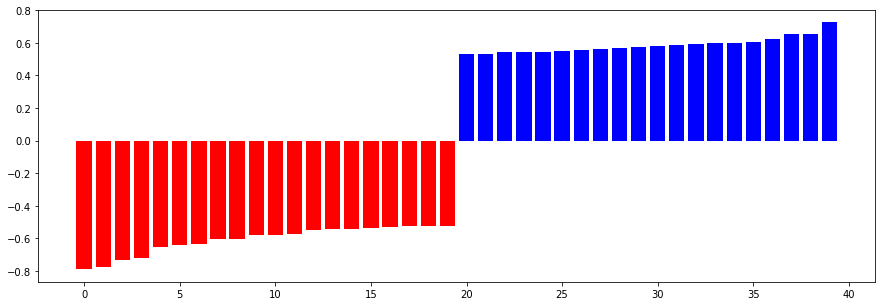

In [99]:
plot_coefficients(lr3, vec3.get_feature_names())

# Другие попытки (неудачные)

# Попытка 1
Идея: добавить биграммы\триграммы в Countvectorizer.

Итог: биграммы сделали хуже (и дольше обучение)
триграммы: лучше точноть класса 1 (0.96), но сильно упал в двуз друних, отклик сильно лучше в -1 и 0 но намного хуже в 1




In [0]:
vec1 = CountVectorizer(ngram_range=(3, 3))
bag_of_words1 = vec1.fit_transform(df.text)
X_train, X_test, y_train, y_test = train_test_split(bag_of_words1, df.label)

In [0]:
nb1 = MultinomialNB()
clf1 = nb1.fit(X_train, y_train)

In [47]:
print(classification_report(y_test, clf1.predict(X_test)))

              precision    recall  f1-score   support

          -1       0.17      0.72      0.28      1032
           0       0.12      0.55      0.20      1460
           1       0.96      0.07      0.13      9134

    accuracy                           0.19     11626
   macro avg       0.42      0.45      0.20     11626
weighted avg       0.79      0.19      0.15     11626



# Попытка 2

Идея: просто выбросить стоп-слова.

Итог: не улучшает рез.

In [48]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [0]:
away = stopwords.words('russian')

In [0]:
vec2 = CountVectorizer(ngram_range=(2, 2), stop_words=away)
bag_of_words2 = vec2.fit_transform(df.text)
x_train, x_test, y_train, y_test = train_test_split(bag_of_words2, df.label)

In [0]:
nb = MultinomialNB()
clf2 = nb.fit(x_train, y_train)

In [69]:
print(classification_report(y_test, clf2.predict(x_test)))

              precision    recall  f1-score   support

          -1       0.37      0.40      0.39      1064
           0       0.19      0.39      0.25      1446
           1       0.87      0.72      0.79      9116

    accuracy                           0.65     11626
   macro avg       0.48      0.50      0.48     11626
weighted avg       0.74      0.65      0.69     11626



# Попытка 5

После лемматизации в двух моделях (ЛР и linearsvc) Почему-то потребовалось сильно увеличить max_iter. 

Разве с лемматизацией не должно было стать меньше признаков?

In [0]:
vec5 = CountVectorizer()
bag_of_words5 = vec5.fit_transform(df.bag)
x_train, x_test, y_train, y_test = train_test_split(bag_of_words5, df.label)

In [0]:
lr = LogisticRegression(max_iter = 10000)
clf5 = lr.fit(x_train, y_train)

In [104]:
print(classification_report(y_test, clf5.predict(x_test)))

              precision    recall  f1-score   support

          -1       0.62      0.55      0.58      1113
           0       0.35      0.31      0.33      1441
           1       0.89      0.92      0.90      9072

    accuracy                           0.81     11626
   macro avg       0.62      0.59      0.61     11626
weighted avg       0.80      0.81      0.80     11626



# Попытка 7

MultinominalNB на tfidf показало ерунду. GaussianNB отказался брать sparse матрицу, переделка ее в dense вообще все уронило - 2 раза (your session has crashed after using all available RAM). Отказалась от идеи.



In [0]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [0]:
vec7 = TfidfVectorizer()
bag_of_words7 = vec7.fit_transform(df.bag)
bag_of_words7 = bag_of_words7.todense()
x_train, x_test, y_train, y_test = train_test_split(bag_of_words7, df.label)

In [138]:
x_train

<bound method spmatrix.todense of <34875x116858 sparse matrix of type '<class 'numpy.float64'>'
	with 7535251 stored elements in Compressed Sparse Row format>>

In [140]:
type(y_train)

pandas.core.series.Series

In [142]:
x_train = x_train.toarray()
x_test = x_test.toarray()

AttributeError: ignored

In [132]:
nb7 = GaussianNB()
clf7 = nb7.fit(x_train, y_train)

TypeError: ignored

# Попытка 8

Tfidf + LR + биграммы работает долго и дает ужасные результаты

Просто Tfidf + LR быстро, но результат похуже, чем просто LR

Учится 1-2 мин

In [0]:
vec8 = TfidfVectorizer()
bag_of_words8 = vec8.fit_transform(df.bag)
x_train, x_test, y_train, y_test = train_test_split(bag_of_words8, df.label)


In [0]:
lr8 = LogisticRegression(max_iter = 5000)
clf8 = lr8.fit(x_train, y_train)

In [17]:
print(classification_report(y_test, clf8.predict(x_test)))

              precision    recall  f1-score   support

          -1       0.72      0.51      0.60      1114
           0       0.49      0.15      0.23      1396
           1       0.86      0.98      0.92      9116

    accuracy                           0.84     11626
   macro avg       0.69      0.55      0.58     11626
weighted avg       0.80      0.84      0.80     11626



# Попытка 9: 
гиперпаратметры ЛГ

(max_iter = 10000, C = 9, class_weight = 'balanced') не дал улучш результата

C  >10 не хватает памяти

Grid работает очень долго


In [0]:
from sklearn.model_selection import GridSearchCV

In [0]:
vec9 = CountVectorizer()
bag_of_words9 = vec9.fit_transform(df.text)
x_train, x_test, y_train, y_test = train_test_split(bag_of_words9, df.label)

In [21]:
lr9 = LogisticRegression(max_iter = 1000)
grid_values = {'penalty': ['l1', 'l2'],'C':[0.001,.009,0.01,.09,1,5,10,25]}
clf9 = GridSearchCV(lr9, param_grid = grid_values)
clf9 = clf9.fit(x_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_se

KeyboardInterrupt: ignored

In [28]:
lr9 = LogisticRegression(max_iter = 10000, C = 9, class_weight = 'balanced')
clf9 = lr9.fit(x_train, y_train)

ERROR! Session/line number was not unique in database. History logging moved to new session 70


In [29]:
print(classification_report(y_test, clf9.predict(x_test)))

              precision    recall  f1-score   support

          -1       0.62      0.58      0.60      1106
           0       0.35      0.31      0.33      1411
           1       0.90      0.92      0.91      9109

    accuracy                           0.81     11626
   macro avg       0.62      0.60      0.61     11626
weighted avg       0.80      0.81      0.81     11626



# Подсказки\сноски (себе)

sklearn.metrics.classification_report**(y_true, y_pred**, labels=None, target_names=None, sample_weight=None, digits=2, output_dict=False, zero_division='warn')[source]¶


как выбрать модель: https://scikit-learn.org/stable/tutorial/machine_learning_map/


---
The implementation is based on libsvm. The fit time scales at least quadratically with the number of samples and may be impractical beyond tens of thousands of samples. For large datasets consider using sklearn.linear_model.LinearSVC or sklearn.linear_model.SGDClassifier instead, possibly after a sklearn.kernel_approximation
